### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading data

In [5]:
!unzip "/content/drive/MyDrive/Colab Notebooks/MNIST_data.zip"
!ls

Archive:  /content/drive/MyDrive/Colab Notebooks/MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               
drive  sample_data  test.csv  train.csv


In [6]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [7]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [8]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [9]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

First image says the data 1

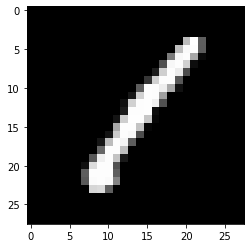

In [12]:
img = data_x.iloc[0].values.reshape((28,28))
plt.imshow(img,cmap='gray')

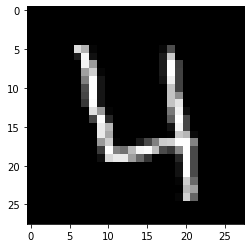

In [11]:
img = data_x.iloc[3].values.reshape((28,28))
plt.imshow(img,cmap='gray')

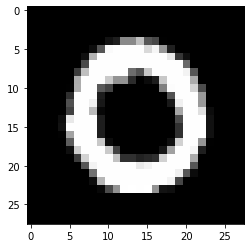

In [13]:
img = data_x.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [ ]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


### Model training

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 [==============================] - 3s 5ms/step - loss: 1.7103 - accuracy: 0.8454 - val_loss: 0.4258 - val_accuracy: 0.9093
Epoch 2/5
591/591 [==============================] - 3s 4ms/step - loss: 0.3079 - accuracy: 0.9290 - val_loss: 0.2937 - val_accuracy: 0.9286
Epoch 3/5
591/591 [==============================] - 2s 4ms/step - loss: 0.1993 - accuracy: 0.9477 - val_loss: 0.3208 - val_accuracy: 0.9250
Epoch 4/5
591/591 [==============================] - 4s 6ms/step - loss: 0.1567 - accuracy: 0.9571 - val_loss: 0.2895 - val_accuracy: 0.9414
Epoch 5/5
591/591 [==============================] - 3s 5ms/step - loss: 0.1416 - accuracy: 0.9613 - val_loss: 0.3027 - val_accuracy: 0.9348


### Model evaluation

In [ ]:
model.predict(X_test).argmax(axis=1)

array([2, 0, 9, ..., 3, 9, 2])

The predicted label is: 0


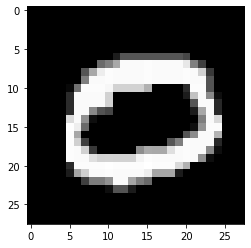

In [ ]:
img = X_test.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance